Topic Modelling (Gensim)
---
<img align=center src= "https://www.researchgate.net/publication/331669603/figure/fig1/AS:735488403070977@1552365508288/The-flow-of-LDA-Retrieved-from-https-toolboxkuriocoid-topic-modeling-696d7ba2592f.png">

Kasus yang akan kita selesaikan yaitu terkait kenaikan harga BBM. 

Proses menyelesaikan masalah di atas menggunakan pipeline pada Gambar di bawah ini:

1. Data collection 
2. Pre-processing
3. Feature Extraction
4. Menentukan Nilai K terbaik
5. Topic Modeling menggunakan LDA
6. Mencari kesimpulan terhadap topik yang terbentuk

<div><h3 style="font-size:30px;color:black;text-align:center"><strong>Topic Modeling Pipeline</strong> </h3></div>
<img align=center src= "https://undangmi.com/wp-content/uploads/2022/09/LDA-pipeline.png">

# 01 Data Acquisition

In [ ]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the dataset
data= pd.read_csv('/content/drive/MyDrive/Gemastik/tweet bbm.csv')
data.head(5)

,tweet
0,@Candra4smara Sudah muak masyarakat akan kepem...
1,@henrysubiakto Habis diskusi SMA tukang ojek ....
2,@pappercklt @tanyakanrl sblm bbm naik jg uda p...
3,"Berasa banget sih naik bbm, dengan motor yang ..."
4,Negara ini akan hancur bila BBM naik #TolakBBM...


# 02 Text Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#preprocessing 
def removeStopword(str):
    #stop_words = stopwords.words('english')
    # get stopword indonesia
    stop_words  = stopwords.words('indonesian')
    # stop_words.extend(["twupal","detikers"])
    more_stopword = ['ga','bs','yg','lg','rp','bogel','btw','nya','tp','jg','cm','bsu','wa','mrpro','kgminggu','berat','si','ya','smswa','dd','ecc','bone','calsea','more','pas','mah',
                 'lu','sms','daff','medan','jgn','ni','good','order','badan','klo','gak','donk','minggu','sambo','kdrt','sok','pake','aja','sehat','alami','malu','ledekin','sdh']                    # Tambahkan kata dalam daftar stopword
    stop_words = stop_words + more_stopword

    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)#remove sentence which contains only one word

def removeSentence(str): 
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''
    
    return str

def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
       
    return str

def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)
    
    return str

<>:31: DeprecationWarning: invalid escape sequence \S
<>:37: DeprecationWarning: invalid escape sequence \s
<>:31: DeprecationWarning: invalid escape sequence \S
<>:37: DeprecationWarning: invalid escape sequence \s
<>:31: DeprecationWarning: invalid escape sequence \S
<>:37: DeprecationWarning: invalid escape sequence \s
<ipython-input-157-7b2701049221>:31: DeprecationWarning: invalid escape sequence \S
  str = re.sub("\S*\d\S*", "", str).strip()
<ipython-input-157-7b2701049221>:37: DeprecationWarning: invalid escape sequence \s
  str = re.sub('[\s]+', ' ', str)


In [ ]:
!pip install swifter 
# Install swifter. digunakan untuk meningkatkan kecepatan proses pandas

import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%time
data['clean_article'] = data['tweet'].swifter.apply(preprocessing)

Pandas Apply:   0%|          | 0/2207 [00:00<?, ?it/s]

CPU times: user 2.4 s, sys: 93.5 ms, total: 2.5 s
Wall time: 2.58 s


In [ ]:
data['token'] = [nltk.word_tokenize(i) for i in data.clean_article] #tokenize string

In [ ]:
data

,tweet,clean_article,token
0,@Candra4smara Sudah muak masyarakat akan kepem...,muak masyarakat kepempnna jokowi bbm gas migor...,"[muak, masyarakat, kepempnna, jokowi, bbm, gas..."
1,@henrysubiakto Habis diskusi SMA tukang ojek ....,henrysubiakto habis diskusi sma tukang ojek ng...,"[henrysubiakto, habis, diskusi, sma, tukang, o..."
2,@pappercklt @tanyakanrl sblm bbm naik jg uda p...,pappercklt tanyakanrl sblm bbm uda pelit,"[pappercklt, tanyakanrl, sblm, bbm, uda, pelit]"
3,"Berasa banget sih naik bbm, dengan motor yang ...",berasa banget sih bbm motor boros bolak rumah ...,"[berasa, banget, sih, bbm, motor, boros, bolak..."
4,Negara ini akan hancur bila BBM naik #TolakBBM...,negara hancur bbm tolakbbmnaik,"[negara, hancur, bbm, tolakbbmnaik]"
...,...,...,...
2202,@worksfess tinggal kerjanya dimana soalnya pen...,worksfess tinggal kerjanya dimana pengaruh har...,"[worksfess, tinggal, kerjanya, dimana, pengaru..."
2203,"Harga BBM Naik, DBH Riau Malah Turun https://...",harga bbm dbh riau turun,"[harga, bbm, dbh, riau, turun]"
2204,Umat mesti terus bersabar dalam berjuang. Ya b...,umat mesti bersabar berjuang berjuang melawan ...,"[umat, mesti, bersabar, berjuang, berjuang, me..."
2205,"bbm naik, tarif tarif naik, sembako naik, maha...",bbm tarif tarif sembako mahasiswa demo turunin...,"[bbm, tarif, tarif, sembako, mahasiswa, demo, ..."


In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(data['token'])
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).print(dictionary)

In [ ]:
print(dictionary)

Dictionary(944 unique tokens: ['bpjs', 'ganti', 'gas', 'jokowi', 'listrik']...)


# 03 Feature Extraction

In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['token']]
#The function doc2bow converts document (a list of words) into the bag-of-words format

'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''

print(len(doc_term_matrix))

print(doc_term_matrix)

tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model

corpus_tfidf = tfidf[doc_term_matrix]



2207
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1)], [(11, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(29, 1), (30, 1), (31, 1)], [(21, 1), (32, 1)], [(33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(36, 1), (38, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 2), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1)], [(64, 3), (65, 1), (66, 2), (67, 4), (68, 2), (69, 1)], [(28, 1)], [(13, 1), (70, 1)], [(35, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1)], [(87, 1), (88, 1)], [(21, 1), (40, 1), (89, 2), (90, 1), (91, 1)], [(21, 1), (92, 1)], [(18, 1), (93, 1), (94, 1), (95, 1), (96, 1),

# 04 Coherence Score
Menentukan jumlah k (topik) terbaik pada LDA

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

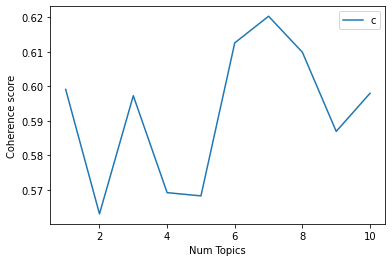

In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=data['token'], limit=limit, start=start, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 11))

Num Topics = 1  has Coherence Value of 0.59910142287
Num Topics = 2  has Coherence Value of 0.56296921105
Num Topics = 3  has Coherence Value of 0.59727126069
Num Topics = 4  has Coherence Value of 0.56914215104
Num Topics = 5  has Coherence Value of 0.56819727269
Num Topics = 6  has Coherence Value of 0.61260304861
Num Topics = 7  has Coherence Value of 0.62032697876
Num Topics = 8  has Coherence Value of 0.60987620488
Num Topics = 9  has Coherence Value of 0.58691177789
Num Topics = 10  has Coherence Value of 0.59796994547


# 05 LDA Model

In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=7) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    print('\n')

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 Word: 0.034*"kerja" + 0.016*"kali" + 0.014*"indonesia" + 0.012*"sepeda" + 0.011*"tni" + 0.011*"turun" + 0.010*"ganjarpranowo" + 0.010*"pangan" + 0.009*"nkri" + 0.009*"rakyat"


Topic: 1 Word: 0.020*"tarif" + 0.019*"gizi" + 0.017*"bus" + 0.017*"peduli" + 0.016*"unit" + 0.015*"naiknya" + 0.015*"pasca" + 0.014*"demo" + 0.013*"ongkos" + 0.013*"dampak"


Topic: 2 Word: 0.020*"solusinya" + 0.016*"amp" + 0.015*"tiket" + 0.014*"hemat" + 0.013*"gemuk" + 0.013*"daftar" + 0.013*"tank" + 0.011*"semenjak" + 0.011*"nkri" + 0.011*"udah"


Topic: 3 Word: 0.123*"solusinya" + 0.013*"aniesbaswedan" + 0.010*"subsidi" + 0.010*"menikmati" + 0.009*"tpi" + 0.009*"rakyat" + 0.009*"w" + 0.009*"kartu" + 0.008*"bu" + 0.008*"negara"


Topic: 4 Word: 0.016*"imbas" + 0.013*"faktor" + 0.013*"supra" + 0.013*"isu" + 0.013*"program" + 0.013*"berkat" + 0.012*"terjawab" + 0.012*"kegelisahan" + 0.012*"bansos" + 0.011*"penguasa"


Topic: 5 Word: 0.053*"info" + 0.052*"produk" + 0.019*"meringankan" + 0.019*"beban" + 

In [ ]:
cv = CountVectorizer(max_df=0.9, min_df=2)
data1 = cv.fit_transform(data["tweet"])

In [ ]:
data1

<2207x3211 sparse matrix of type '<class 'numpy.int64'>'
	with 35655 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF (n_components=7, random_state = 42)

In [ ]:
nmf_model.fit(data1)

NMF(n_components=7, random_state=42)

In [ ]:
topic_result = nmf_model.transform(data1)

In [ ]:
topic_result.argmax(axis=1)

array([6, 6, 3, ..., 6, 6, 6])

In [ ]:
data['Topic'] = topic_result.argmax(axis=1)

In [ ]:
data

,tweet,clean_article,token,Topic
0,@Candra4smara Sudah muak masyarakat akan kepem...,muak masyarakat kepempnna jokowi bbm gas migor...,"[muak, masyarakat, kepempnna, jokowi, bbm, gas...",6
1,@henrysubiakto Habis diskusi SMA tukang ojek ....,henrysubiakto habis diskusi sma tukang ojek ng...,"[henrysubiakto, habis, diskusi, sma, tukang, o...",6
2,@pappercklt @tanyakanrl sblm bbm naik jg uda p...,pappercklt tanyakanrl sblm bbm uda pelit,"[pappercklt, tanyakanrl, sblm, bbm, uda, pelit]",3
3,"Berasa banget sih naik bbm, dengan motor yang ...",berasa banget sih bbm motor boros bolak rumah ...,"[berasa, banget, sih, bbm, motor, boros, bolak...",3
4,Negara ini akan hancur bila BBM naik #TolakBBM...,negara hancur bbm tolakbbmnaik,"[negara, hancur, bbm, tolakbbmnaik]",6
...,...,...,...,...
2202,@worksfess tinggal kerjanya dimana soalnya pen...,worksfess tinggal kerjanya dimana pengaruh har...,"[worksfess, tinggal, kerjanya, dimana, pengaru...",0
2203,"Harga BBM Naik, DBH Riau Malah Turun https://...",harga bbm dbh riau turun,"[harga, bbm, dbh, riau, turun]",5
2204,Umat mesti terus bersabar dalam berjuang. Ya b...,umat mesti bersabar berjuang berjuang melawan ...,"[umat, mesti, bersabar, berjuang, berjuang, me...",6
2205,"bbm naik, tarif tarif naik, sembako naik, maha...",bbm tarif tarif sembako mahasiswa demo turunin...,"[bbm, tarif, tarif, sembako, mahasiswa, demo, ...",6


In [ ]:
writer = pd.ExcelWriter('count.xlsx')
data.to_excel(writer)
writer.save()

# 06 Topic Modeling Visualization

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
data
#print(data)
#pyLDAvis.save_html(data, 'lda-gensim.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.072101 -0.037651       1        1  18.249949
3      0.104217  0.076388       2        1  15.195202
5     -0.186248  0.101666       3        1  15.146839
1     -0.053413 -0.139149       4        1  14.260468
4     -0.019016 -0.091906       5        1  14.066549
2      0.050787  0.085705       6        1  11.772173
6      0.031572  0.004946       7        1  11.308820, topic_info=            Term        Freq       Total Category  logprob  loglift
106    solusinya  106.000000  106.000000  Default  30.0000  30.0000
642       produk   40.000000   40.000000  Default  29.0000  29.0000
641         info   43.000000   43.000000  Default  28.0000  28.0000
157        kerja   46.000000   46.000000  Default  27.0000  27.0000
826  meringankan   15.000000   15.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
138          blt    3.970914   13.023912   Topic7  -4.9540   0.9918
225      inflasi    4.360885   22.770671   Topic7  -4.8603   0.5268
163     kenaikan    4.157132   21.905988   Topic7  -4.9081   0.5177
85          udah    3.832817   20.908405   Topic7  -4.9894   0.4830
617        mikir    3.509357   10.280038   Topic7  -5.0775   1.1048

[347 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
370       2  0.415004     air
370       3  0.103751     air
370       4  0.103751     air
370       5  0.103751     air
370       6  0.207502     air
...     ...       ...     ...
450       1  0.814670     yah
806       5  0.627190  yuntho
806       6  0.358394  yuntho
615       1  0.669640   yusuf
615       2  0.167410   yusuf

[677 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 6, 2, 5, 3, 7])